Aim:

PERFORM DECISION TREES ON A DATASET AND ANALYSE THE PERFORMANCE

Algorithm:

A Decision Tree Classifier is a supervised machine learning algorithm used for classification tasks. It builds a tree-like model where each internal node represents a feature, each branch a decision rule, and each leaf node a class label. The tree is constructed by recursively splitting the data based on the feature that provides the best separation, using criteria like Gini Impurity or Information Gain. The process continues until stopping conditions are met, such as when the data in a node is pure, or when the tree reaches a predefined depth. Once built, the model classifies new data by traversing the tree to the appropriate leaf. While decision trees are easy to interpret and handle both numerical and categorical data, they can suffer from overfitting, and may require pruning to improve performance.

Code:

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report , ConfusionMatrixDisplay

In [2]:
df = pd.read_csv("drug200.csv")

In [3]:
df.info

<bound method DataFrame.info of      Age Sex      BP Cholesterol  Na_to_K   Drug
0     23   F    HIGH        HIGH   25.355  drugY
1     47   M     LOW        HIGH   13.093  drugC
2     47   M     LOW        HIGH   10.114  drugC
3     28   F  NORMAL        HIGH    7.798  drugX
4     61   F     LOW        HIGH   18.043  drugY
..   ...  ..     ...         ...      ...    ...
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX

[200 rows x 6 columns]>

In [4]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [5]:
df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [6]:
encoder = LabelEncoder()
for i in df.columns:
    if df[i].dtype == object:
        df[i] = encoder.fit_transform(df[i])

In [7]:
df.dtypes

Age              int64
Sex              int64
BP               int64
Cholesterol      int64
Na_to_K        float64
Drug             int64
dtype: object

In [8]:
X = df.drop("Drug",axis = 1)
y = df["Drug"]

In [9]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.3,random_state = 100)

In [10]:
dtree_gini = DecisionTreeClassifier(criterion = "gini")
dtree_gini = dtree_gini.fit(X_train,y_train)

y_pred = dtree_gini.predict(X_test)

Output:

In [11]:
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9833333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         5
           3       1.00      0.92      0.96        13
           4       0.97      1.00      0.98        31

    accuracy                           0.98        60
   macro avg       0.99      0.98      0.99        60
weighted avg       0.98      0.98      0.98        60



In [12]:
# features = ['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']
# # tree.plot_tree(dtree_gini,feature_names = features)

In [13]:
dtree_entropy = DecisionTreeClassifier(criterion = "entropy")
dtree_entropy = dtree_entropy.fit(X_train,y_train)

y_pred = dtree_entropy.predict(X_test)

In [14]:
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9833333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         5
           3       1.00      0.92      0.96        13
           4       0.97      1.00      0.98        31

    accuracy                           0.98        60
   macro avg       0.99      0.98      0.99        60
weighted avg       0.98      0.98      0.98        60



In [15]:
# features = ['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']
# tree.plot_tree(dtree_entropy,feature_names = features)

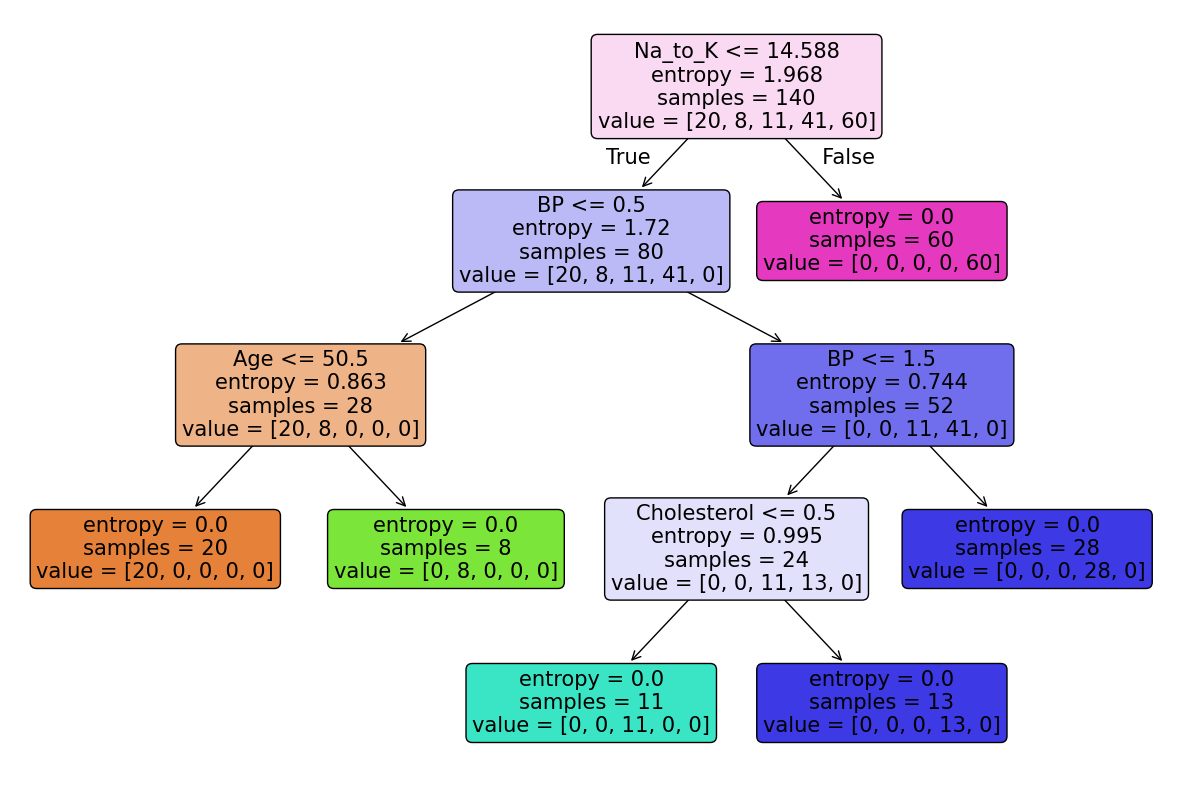

In [16]:
features = ['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']
plt.figure(figsize=(15, 10))
tree.plot_tree(dtree_entropy, filled=True, feature_names=features, rounded=True)
plt.show()

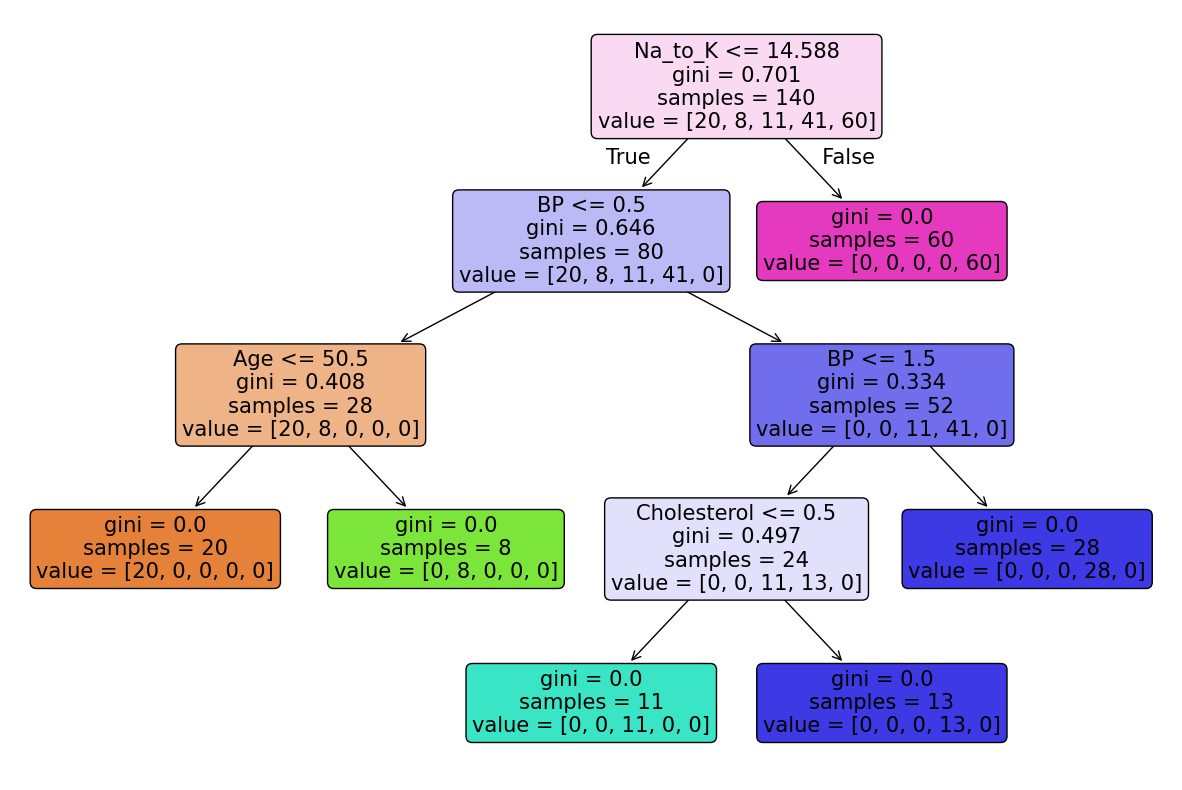

In [17]:
plt.figure(figsize=(15, 10))
tree.plot_tree(dtree_gini, filled=True, feature_names=features, rounded=True)
plt.show()

Result:
The decision tree has been generated using gini and entropy